Installing the required packages

In [1]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Loading the Dataset

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


 Vectorize the sequences

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Step 1 :
Building a three layer model by using tanh and 16 neurons

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(16, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 84ms/step - loss: 0.1600 - accuracy: 0.7939 - val_loss: 0.1078 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0758 - accuracy: 0.9114 - val_loss: 0.0877 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0500 - accuracy: 0.9458 - val_loss: 0.0877 - val_accuracy: 0.8791
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0364 - accuracy: 0.9637 - val_loss: 0.0845 - val_accuracy: 0.8822
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0258 - accuracy: 0.9778 - val_loss: 0.0879 - val_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0187 - accuracy: 0.9849 - val_loss: 0.0911 - val_accuracy: 0.8769
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0139 - accuracy: 0.9897 - val_loss: 0.0941 - val_accuracy: 0.8765
Epoch 8/20
30

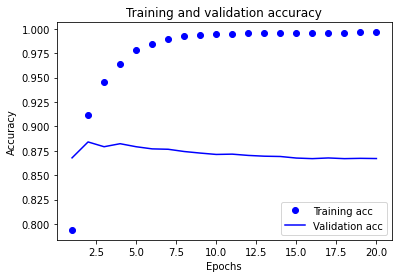

In [18]:
import matplotlib.pyplot as plt
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Step 2 : Add dropout and regularizers to the model, and increase the number of hidden units to 32 and 64 , using tanh activation.

In [17]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


model = keras.Sequential()
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="tanh"))
model.add(Dense(1, activation="sigmoid",activity_regularizer=regularizers.L2(0.01)))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 4s 103ms/step - loss: 0.1898 - accuracy: 0.7355 - val_loss: 0.1104 - val_accuracy: 0.8620
Epoch 2/30
30/30 [==============================] - 4s 127ms/step - loss: 0.0900 - accuracy: 0.8911 - val_loss: 0.0876 - val_accuracy: 0.8880
Epoch 3/30
30/30 [==============================] - 4s 149ms/step - loss: 0.0605 - accuracy: 0.9293 - val_loss: 0.0881 - val_accuracy: 0.8885
Epoch 4/30
30/30 [==============================] - 4s 119ms/step - loss: 0.0483 - accuracy: 0.9461 - val_loss: 0.0926 - val_accuracy: 0.8837
Epoch 5/30
30/30 [==============================] - 4s 126ms/step - loss: 0.0400 - accuracy: 0.9570 - val_loss: 0.0966 - val_accuracy: 0.8838
Epoch 6/30
30/30 [==============================] - 2s 74ms/step - loss: 0.0349 - accuracy: 0.9628 - val_loss: 0.1000 - val_accuracy: 0.8821
Epoch 7/30
30/30 [==============================] - 1s 47ms/step - loss: 0.0294 - accuracy: 0.9719 - val_loss: 0.1023 - val_accuracy: 0.8819
Epoch 8/

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

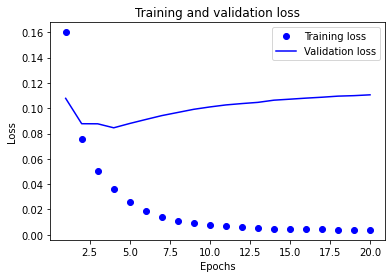

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

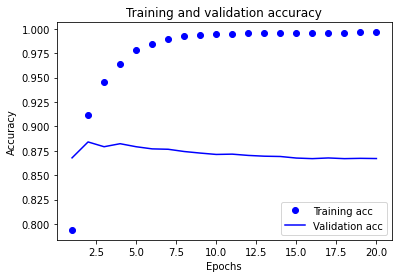

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


model = keras.Sequential()
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh",activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 5s 117ms/step - loss: 0.1722 - accuracy: 0.7892 - val_loss: 0.1035 - val_accuracy: 0.8802
Epoch 2/30
30/30 [==============================] - 2s 70ms/step - loss: 0.0854 - accuracy: 0.9136 - val_loss: 0.0987 - val_accuracy: 0.8812
Epoch 3/30
30/30 [==============================] - 3s 111ms/step - loss: 0.0615 - accuracy: 0.9377 - val_loss: 0.0989 - val_accuracy: 0.8766
Epoch 4/30
30/30 [==============================] - 2s 73ms/step - loss: 0.0493 - accuracy: 0.9497 - val_loss: 0.1012 - val_accuracy: 0.8760
Epoch 5/30
30/30 [==============================] - 3s 98ms/step - loss: 0.0392 - accuracy: 0.9615 - val_loss: 0.1059 - val_accuracy: 0.8730
Epoch 6/30
30/30 [==============================] - 2s 70ms/step - loss: 0.0351 - accuracy: 0.9647 - val_loss: 0.1077 - val_accuracy: 0.8704
Epoch 7/30
30/30 [==============================] - 2s 68ms/step - loss: 0.0299 - accuracy: 0.9704 - val_loss: 0.1129 - val_accuracy: 0.8701
Epoch 8/30


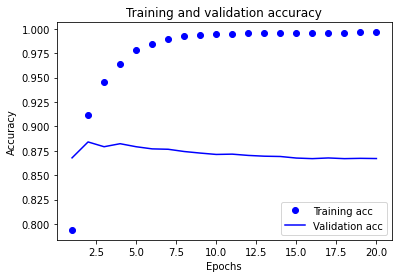

In [21]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()